### 데이터세트 설명
이 보고서는 제조 프로세스에서 수집된 실제 데이터를 시뮬레이션하는 제조 데이터세트에 대한 분석을 제공합니다. 데이터 세트는 다양한 프로세스 매개변수와 제품 품질 간의 관계를 탐색하도록 설계되었습니다. 여기에는 공정 조건을 나타내는 특성 변수와 제조된 품목의 품질 등급을 나타내는 대상 변수가 모두 포함됩니다.

### 컬럼명 설명
온도(°C) : 이 열은 제조 과정 중 온도를 섭씨 단위로 나타냅니다. 온도는 많은 제조 공정에서 중요한 역할을 하며 재료 특성과 제품 품질에 영향을 미칩니다.

압력(kPa) : 제조 과정에서 가해지는 압력으로 킬로파스칼(kPa) 단위로 측정됩니다. 압력은 재료 변형과 제조 공정의 전반적인 결과에 영향을 미칠 수 있습니다.

온도 x 압력 : 이 기능은 온도와 압력 사이의 상호작용 항으로, 두 공정 매개변수의 결합 효과를 포착합니다.

재료 융합 지표 : 온도의 제곱과 압력의 세제곱의 합으로 계산되는 파생 지표입니다. 이는 제조 공정 중 재료 융합 관련 측정을 나타냅니다.

재료 변환 지표 : 온도의 세제곱에서 압력의 제곱을 뺀 값으로 계산되는 또 다른 파생 지표입니다. 이는 재료 변형 역학에 대한 통찰력을 제공합니다.

품질평가 : 목표변수인 '품질평가'는 생산된 품목의 전반적인 품질평가를 나타낸다. 품질은 제조에 있어서 중요한 측면이며, 이 등급은 최종 제품의 품질을 측정하는 척도로 사용됩니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/manufacturing.csv')
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [3]:
df.isna().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [4]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'Temperature (°C)'}>,
        <Axes: title={'center': 'Pressure (kPa)'}>],
       [<Axes: title={'center': 'Temperature x Pressure'}>,
        <Axes: title={'center': 'Material Fusion Metric'}>],
       [<Axes: title={'center': 'Material Transformation Metric'}>,
        <Axes: title={'center': 'Quality Rating'}>]], dtype=object)

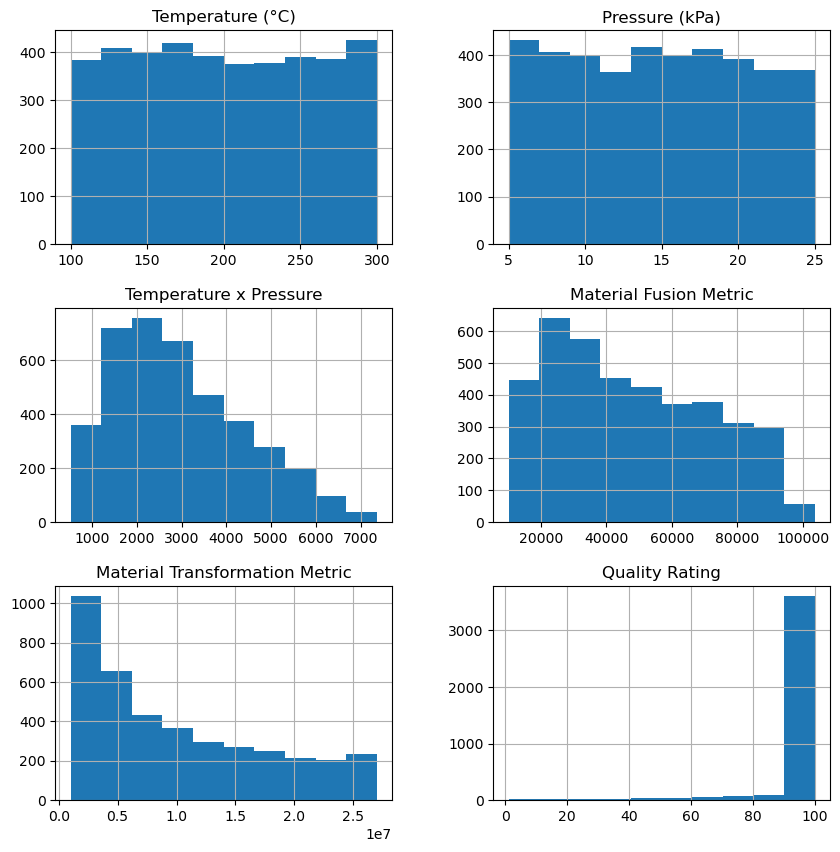

In [5]:
df.hist(figsize=(10,10))

In [6]:
df['Quality Rating'].describe().T

count    3957.000000
mean       96.260179
std        12.992262
min         1.000000
25%        99.941129
50%        99.999997
75%       100.000000
max       100.000000
Name: Quality Rating, dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(df)
std_int_df = pd.DataFrame(result, columns=df.columns)
std_int_df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,0.167354,-1.172126,-0.868667,-0.151411,-0.106191,0.287884
1,0.739797,0.172666,0.608769,0.625539,0.568398,0.286786
2,0.352977,-1.208119,-0.840510,0.041949,0.091063,0.287868
3,0.153831,1.554332,1.382277,0.378076,-0.119861,0.287884
4,-0.263275,0.170196,-0.025360,-0.422483,-0.491243,0.287886
...,...,...,...,...,...,...
3952,-0.743581,1.209211,0.317053,-0.553787,-0.813455,0.287886
3953,-0.037577,-1.130394,-0.901761,-0.353322,-0.301605,0.287886
3954,0.710882,0.273136,0.686526,0.610290,0.529470,0.287064
3955,0.154925,1.558464,1.386733,0.380895,-0.118764,0.287884


In [8]:
condition = True

for column in std_int_df.columns:
    condition &= std_int_df[column].between(-1.96, 1.96)

std_int_df = std_int_df[condition]
std_int_df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,0.167354,-1.172126,-0.868667,-0.151411,-0.106191,0.287884
1,0.739797,0.172666,0.608769,0.625539,0.568398,0.286786
2,0.352977,-1.208119,-0.840510,0.041949,0.091063,0.287868
3,0.153831,1.554332,1.382277,0.378076,-0.119861,0.287884
4,-0.263275,0.170196,-0.025360,-0.422483,-0.491243,0.287886
...,...,...,...,...,...,...
3952,-0.743581,1.209211,0.317053,-0.553787,-0.813455,0.287886
3953,-0.037577,-1.130394,-0.901761,-0.353322,-0.301605,0.287886
3954,0.710882,0.273136,0.686526,0.610290,0.529470,0.287064
3955,0.154925,1.558464,1.386733,0.380895,-0.118764,0.287884


In [9]:
df = df.iloc[std_int_df.index].reset_index(drop=True)
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3630,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3631,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3632,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3633,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [10]:
# df = df.drop(labels=['Pressure (kPa)'], axis=1)
df = df.drop(labels=['Pressure (kPa)', 'Temperature (°C)'], axis=1)

array([[<Axes: title={'center': 'Temperature x Pressure'}>,
        <Axes: title={'center': 'Material Fusion Metric'}>],
       [<Axes: title={'center': 'Material Transformation Metric'}>,
        <Axes: title={'center': 'Quality Rating'}>]], dtype=object)

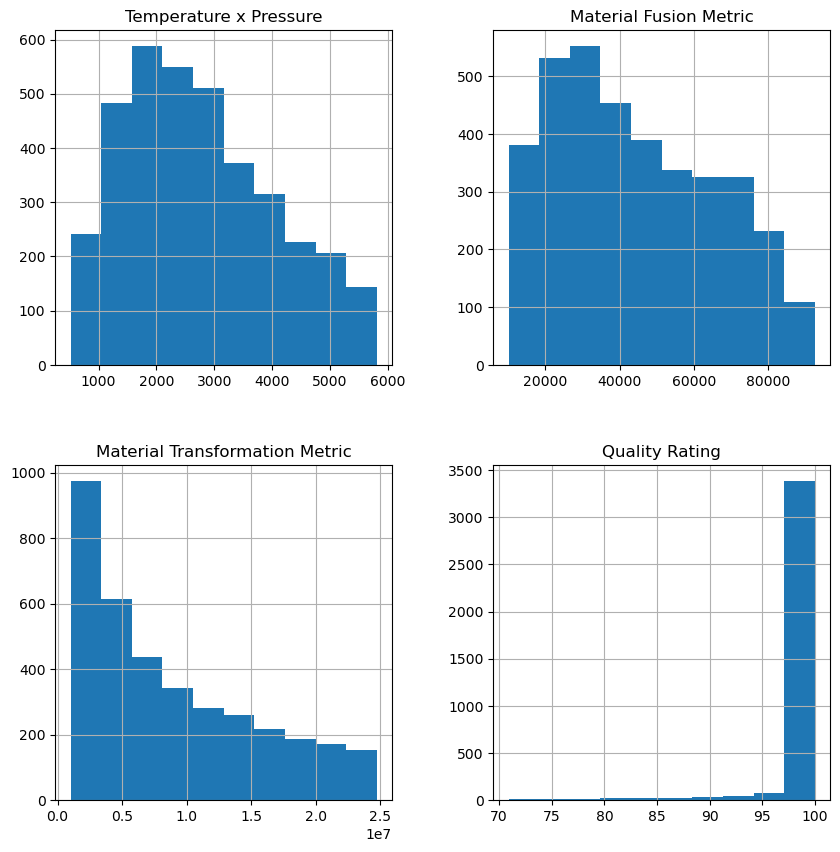

In [11]:
df.hist(figsize=(10,10))

In [12]:
df['Quality Rating'].describe().T

count    3635.000000
mean       99.096270
std         3.653361
min        70.898699
25%        99.993063
50%       100.000000
75%       100.000000
max       100.000000
Name: Quality Rating, dtype: float64

<Axes: >

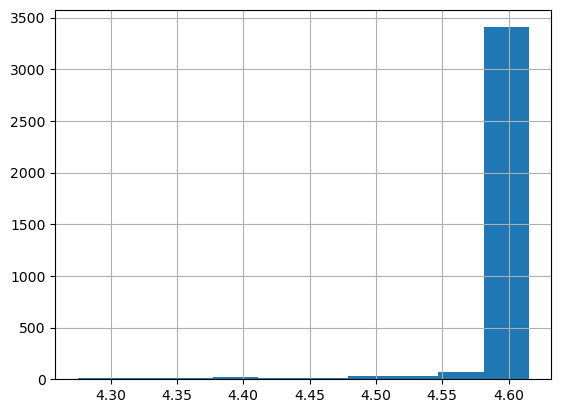

In [13]:
import numpy as np
np.log1p(df['Quality Rating']).hist()

In [14]:
df.corr()['Quality Rating'].sort_values(ascending=False)[1:]

Temperature x Pressure           -0.188997
Material Fusion Metric           -0.467853
Material Transformation Metric   -0.536426
Name: Quality Rating, dtype: float64

In [15]:
df.corr()['Material Fusion Metric'].sort_values(ascending=False)[1:]

Material Transformation Metric    0.972498
Temperature x Pressure            0.647968
Quality Rating                   -0.467853
Name: Material Fusion Metric, dtype: float64

<Axes: >

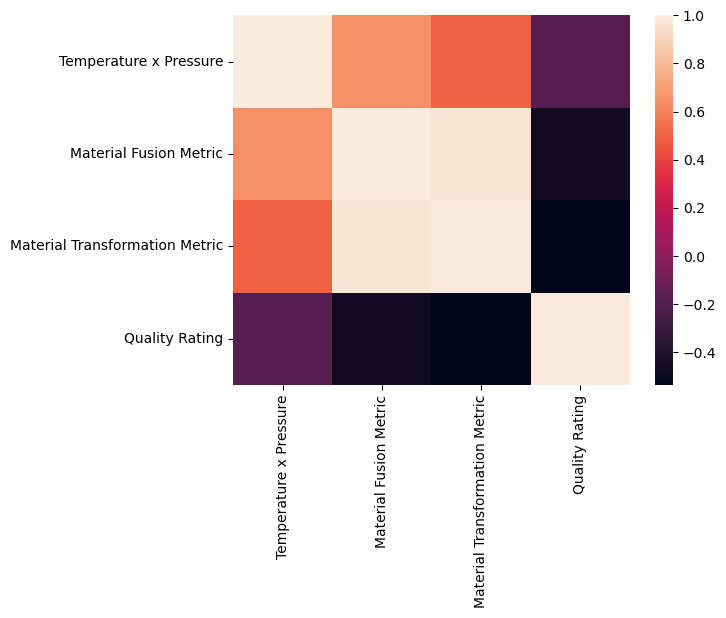

In [16]:
sns.heatmap(df.corr())

### ✨ 1 Cycle
> 회귀모델 분석을 통해 선형 / 비선형 데이터 확인

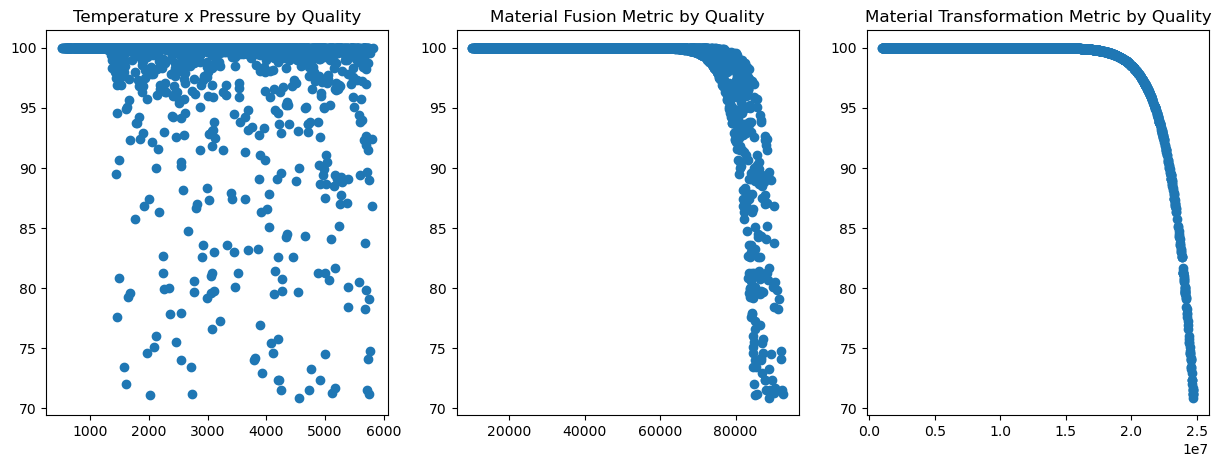

In [17]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(df['Temperature x Pressure'], df['Quality Rating'])
axes[0].set_title('Temperature x Pressure by Quality')
axes[1].scatter(df['Material Fusion Metric'], df['Quality Rating'])
axes[1].set_title('Material Fusion Metric by Quality')
axes[2].scatter(df['Material Transformation Metric'], df['Quality Rating'])
axes[2].set_title('Material Transformation Metric by Quality')
plt.show()

In [18]:
pre_df = df.copy()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:,:-1] , pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [21]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 7.3460, RMSE: 2.7104, MSLE: 0.0009, RMSLE: 0.0303, R2: 0.3450


In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=105)

p_r = LinearRegression()
p_r.fit(X_train, y_train)

LinearRegression()

C:\Users\user\AppData\Local\Temp\ipykernel_21972\1029853184.py:21: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21972\1029853184.py:21: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21972\1029853184.py:21: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21972\1029853184.py:21: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21972\1029853184.py:21: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_21972\1029853184.py:21: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  plt.tight_layout()
C:\User

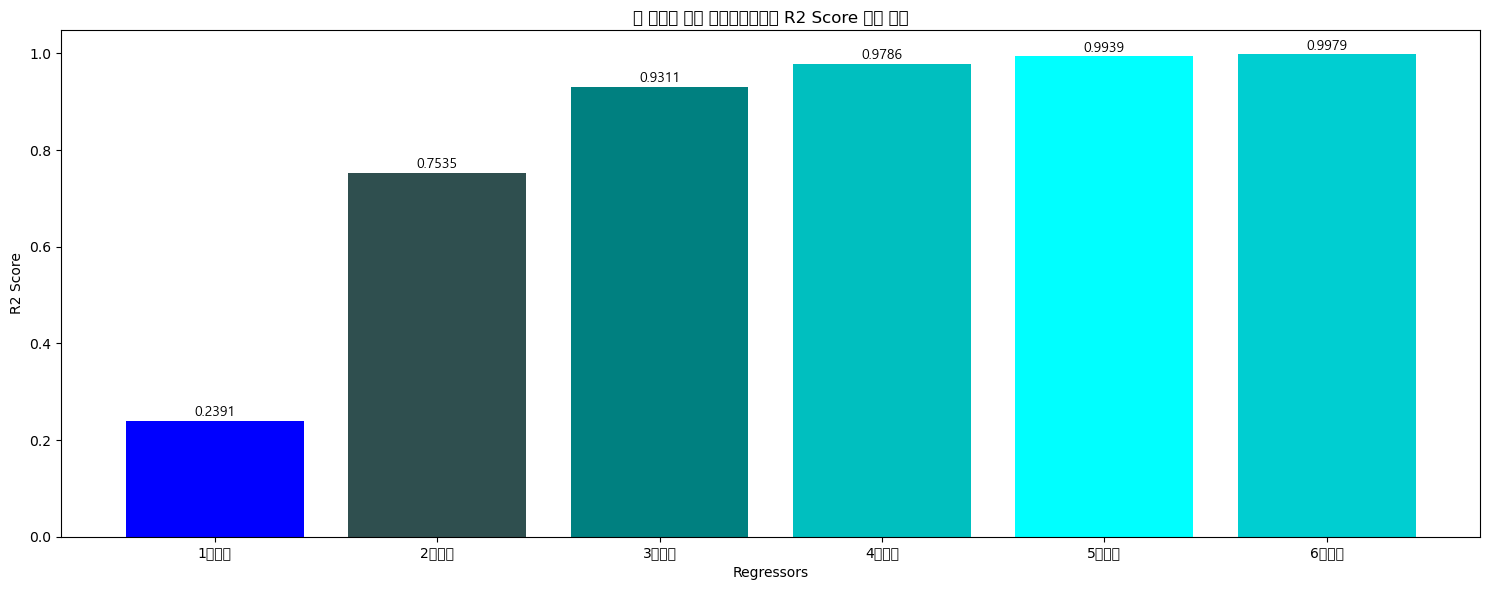

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(15, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['blue', 'darkslategray', 'teal', 'c', 'cyan', 'darkturquoise', 'cadetblue']

scores = [0.2391, 0.7535, 0.9311, 0.9786, 0.9939, 0.9979]

regressers = ['1차항식','2차항식', '3차항식', '4차항식', '5차항식', '6차항식']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('항 차수에 따른 다항회귀모델의 R2 Score 성능 점수')

plt.tight_layout() 

plt.show()

In [24]:
prediction = p_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.2406, RMSE: 0.4905, MSLE: 0.0000, RMSLE: 0.0055, R2: 0.9786


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105)
gb_r = GradientBoostingRegressor(random_state=105, n_estimators=100)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 0.0021, RMSE: 0.0461, MSLE: 0.0000, RMSLE: 0.0005, R2: 0.9998
RandomForestRegressor
MSE: 0.0009, RMSE: 0.0295, MSLE: 0.0000, RMSLE: 0.0004, R2: 0.9999
GradientBoostingRegressor
MSE: 0.0009, RMSE: 0.0305, MSLE: 0.0000, RMSLE: 0.0004, R2: 0.9999
XGBRegressor
MSE: 0.0178, RMSE: 0.1334, MSLE: 0.0000, RMSLE: 0.0016, R2: 0.9984
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2908, number of used features: 3
[LightGBM] [Info] Start training from score 99.068960
LGBMRegressor
MSE: 0.0395, RMSE: 0.1986, MSLE: 0.0000, RMSLE: 0.0026, R2: 0.9965


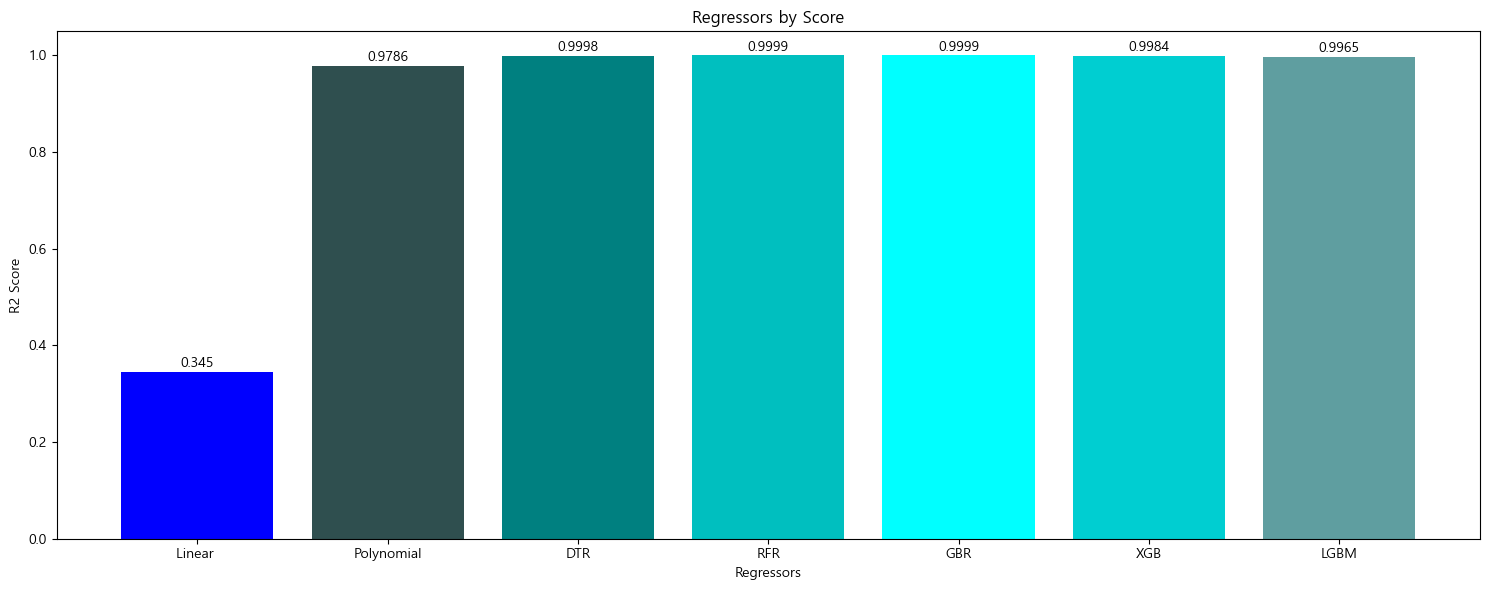

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(15, 6))

colors = ['blue', 'darkslategray', 'teal', 'c', 'cyan', 'darkturquoise', 'cadetblue', 'skyblue']

scores = [0.3450, 0.9786, 0.9998, 0.9999, 0.9999, 0.9984, 0.9965]

regressers = ['Linear ','Polynomial','DTR' ,'RFR', 'GBR', 'XGB', 'LGBM']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('Regressors by Score')

plt.tight_layout() 

plt.show()

### 💡 1 Cycle Result
> 각 독립변수들의 종속변수에 대한 상관관계 산점도 분포를 볼때 뚜렷한 상관관계가 나타나지 않았으며, 직선 형태로 나타나지 않았고, 최종적으로 독립변수들과 종속변수 간의 관계가 직선 형태가 아니며 비선형적임을 볼 때 비선형 데이터로 판단 할 수 있습니다.
>
> 또한 선형회귀모델의 성능이 매우 낮고, 나머지 비선형회귀모델들의 성능이 매우 좋은 것을 보아할 때 해당 데이터는 비선형 데이터일 가능성이 높습니다.

### 💡 2 Cycle
> OLS , 다중공선성 해소 후 과적합 유무 확인

In [27]:
from statsmodels.api import OLS

features, targets = df.iloc[:, :-1], df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:         Quality Rating   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          2.510e+04
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        16:47:17   Log-Likelihood:                         -16271.
No. Observations:                3635   AIC:                                  3.255e+04
Df Residuals:                    3632   BIC:                                  3.257e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [29]:
get_vif(features)

,vif_score,feature
0,20.345615,Temperature x Pressure
1,106.823759,Material Fusion Metric
2,46.871627,Material Transformation Metric


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


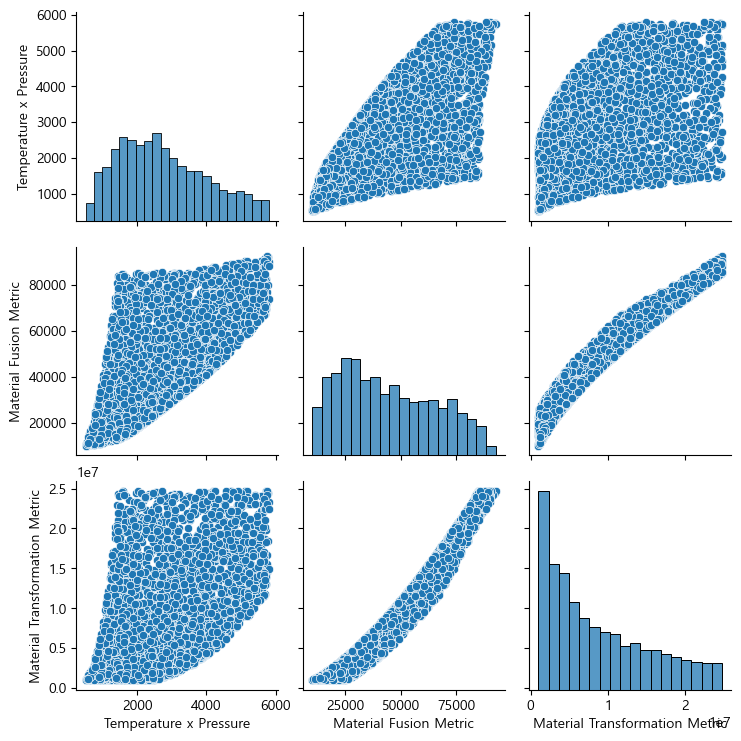

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(pre_df.iloc[:, :-1])
plt.show()

### 💡2 Cycle
> 다중공선성 문제가 심한 것을 볼 수 있으며, 특히 재료 융합 지표와 재료 변환 지표간의 다중공선성이 크게 존재하는 것을 알 수 있습니다.
>
> 과적합 여부 확인
>
> 과적합 데이터라면 Ridge, Lasso로 다중공선성 + 과적합 해소 
>
> 타겟데이터로부터 상관관계가 낮았던 Material Fusion Metric를 제거 후 제거 전 데이터와 회귀모델 비교
> 
> 

In [31]:
del_df = pre_df.copy()

In [32]:
del_df = del_df.drop(labels=['Material Fusion Metric'], axis=1)

In [33]:
from statsmodels.api import OLS

features, targets = del_df.iloc[:, :-1], del_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:         Quality Rating   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              8184.
Date:                Thu, 16 May 2024   Prob (F-statistic):                        0.00
Time:                        16:47:19   Log-Likelihood:                         -18767.
No. Observations:                3635   AIC:                                  3.754e+04
Df Residuals:                    3633   BIC:                                  3.755e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [35]:
get_vif(features)

,vif_score,feature
0,3.562111,Temperature x Pressure
1,3.562111,Material Transformation Metric


#### 📌 기존  VIF 스코어가 매우 높았던 Material Fusion Metric Feature 제거 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


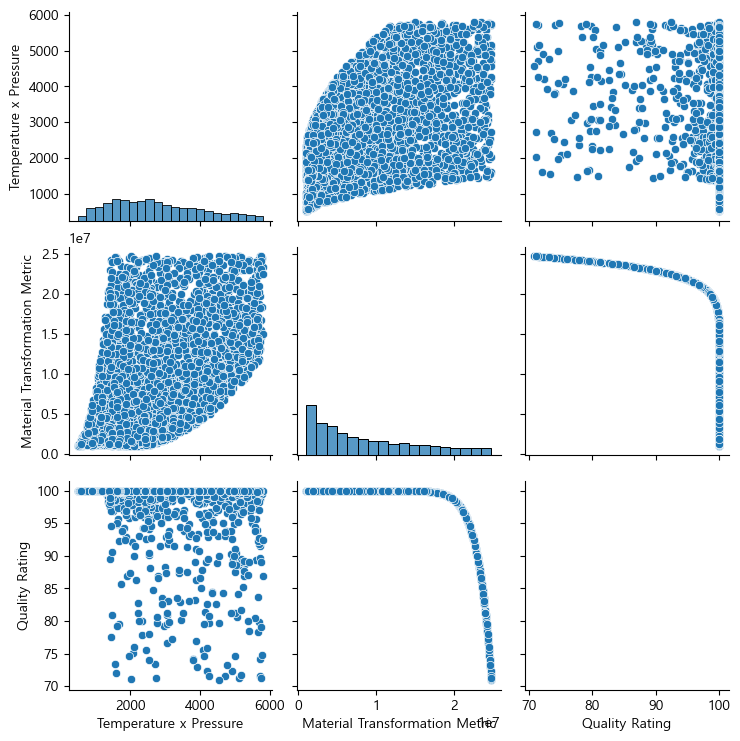

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(del_df)
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

features, targets = del_df.iloc[:,:-1], del_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=105)

p_r = LinearRegression()
p_r.fit(X_train, y_train)

LinearRegression()

In [38]:
prediction = p_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 1.5946, RMSE: 1.2628, MSLE: 0.0002, RMSLE: 0.0141, R2: 0.8578


In [39]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

features, targets = del_df.iloc[:,:-1], del_df.iloc[:, -1]

# 데이터를 훈련 세트, 검증 세트, 테스트 세트로 나눔
X_train, X_test, y_train, y_test = \
    train_test_split(features, targets, test_size=0.2, random_state=105)

# Random Forest 모델 초기화
rf_model = RandomForestRegressor(random_state=105)

# 모델 훈련
parameters = {'max_depth': [11,12,13], 'min_samples_split': [14,15,16], 'n_estimators': [10, 50, 100]}
kfold = KFold(n_splits=10, random_state=105, shuffle=True)

# grid_rf_r = GridSearchCV(rf_model, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)
prediction = grid_rf_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 0.0104, RMSE: 0.1021, MSLE: 0.0000, RMSLE: 0.0013, R2: 0.9991


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

features, targets = del_df.iloc[:,:-1], del_df.iloc[:, -1]

# 데이터를 훈련 세트, 검증 세트, 테스트 세트로 나눔
X_train, X_val, y_train, y_val = \
    train_test_split(features, targets, test_size=0.2, random_state=105)

X_val, X_test, y_val, y_test = \
    train_test_split(X_val, y_val, test_size=0.2, random_state=105)

# Random Forest 모델 초기화
rf_model = RandomForestRegressor(random_state=105)

# 모델 훈련
parameters = {'max_depth': [11,12,13], 'min_samples_split': [14,15,16], 'n_estimators': [10, 50, 100]}
kfold = KFold(n_splits=10, random_state=105, shuffle=True)

grid_rf_r = GridSearchCV(rf_model, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)

# 훈련 데이터로 예측 및 손실 계산
train_preds = grid_rf_r.predict(X_train)
train_loss = mean_squared_error(y_train, train_preds)

# 검증 데이터로 예측 및 손실 계산
val_preds = grid_rf_r.predict(X_val)
val_loss = mean_squared_error(y_val, val_preds)

# 손실값 출력
print("Train Loss:", train_loss)
print("Validation Loss:", val_loss)



In [ ]:
# 그래프를 통한 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_train, train_preds, 'o', label='Training Data')
plt.plot(y_val, val_preds, 'o', label='Validation Data')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

### ✨ 2 Cycle Result
- VIF 점수가 매우 높았던 재료 융합 지표 (Material Fusion Metric) Feature를 제거 후 과적합 여부를 확인하기 위해  회귀모델의 성능 점수를 RandomForest 회귀 모델로 분석 해보았습니다.

- 그 결과 Feature 제거 후 다중 공선성 문제를 해결한 해당 데이터의 교차검증을 수행한 검증데이터와 Test 데이터의 성능점수가 거의 동일 한 것을 볼 수 있었으며, 해당 데이터의 과적합은 발견되지 않은 것을 볼 수 있습니다.

### ✨ 3 Cycle
> 기존 Feature 제거 전 데이터와 성능 비교 분석

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

features, targets = df.iloc[:,:-1] , df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=105)
p_r = LinearRegression()
p_r.fit(X_train, y_train)

In [ ]:
prediction = p_r.predict(X_test)
get_evaluation(y_test, prediction)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=4).fit_transform(features)

features, targets = del_df.iloc[:,:-1] , del_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=105)
p_r = LinearRegression()
p_r.fit(X_train, y_train)

In [ ]:
prediction = p_r.predict(X_test)
get_evaluation(y_test, prediction)

### 다중공선성 해소 데이터 회귀모델 점수

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation0(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('Test Data : MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation1(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('Test Data : MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = del_df.iloc[:, :-1], del_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105)
gb_r = GradientBoostingRegressor(random_state=105, n_estimators=100)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

### 기존 Feature 제거 전 회귀 모델 점수 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105)
gb_r = GradientBoostingRegressor(random_state=105, n_estimators=100)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(10, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['blue', 'darkslategray', 'teal', 'c', 'cyan', 'darkturquoise', 'cadetblue']

scores = [0.9786, 0.9998, 0.9999, 0.9999, 0.9984, 0.9965]

regressers = ['Polynomial ','DTR', 'RFR', 'GBR', 'XGB', 'LGBM']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('Before Nomalization Regressor by R2 Score')

plt.tight_layout() 

plt.show()


fig, axes = plt.subplots(1, figsize=(10, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['red', 'salmon', 'tomato', 'lightsalmon', 'lightcoral', 'brown', 'orange']

scores = [0.9786, 0.9997, 0.9999, 0.9999, 0.9983, 0.9971]

regressers = ['Polynomial ','DTR', 'RFR', 'GBR', 'XGB', 'LGBM']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('After Nomalization Regressor by R2 Score')

plt.tight_layout() 

plt.show()

### 💡 3 Cycle Result
- 기존 Feature 제거 전 데이터의 회귀모델들과 다중공선성을 해소한 데이터의 회귀모델들의 성능이 서로 큰 차이가 없고 매우 높은 성능을 보여주는 것을 볼 수 있습니다. 그중에서도 가장 성능이 좋았던 회귀모델은 RandomForest회귀모델과, GradientBoostingRegressor회귀모델 이였습니다.

In [ ]:
o_df = pd.read_csv('./datasets/manufacturing.csv')
o_df

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(o_df)
std_int_df = pd.DataFrame(result, columns=o_df.columns)
std_int_df

In [ ]:
condition = True

for column in std_int_df.columns:
    condition &= std_int_df[column].between(-1.96, 1.96)

std_int_df = std_int_df[condition]
std_int_df

In [ ]:
o_df = o_df.iloc[std_int_df.index].reset_index(drop=True)


In [ ]:
o_df

In [ ]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

ptf = PowerTransformer(standardize=True)
result = ptf.fit_transform(o_df[['Quality Rating']])
o_df['Target_yeo'] = result
o_df

In [ ]:
o_df.Target_yeo.hist()
plt.title('Power Transformer by Target Data')

In [ ]:
df['Quality Rating'].hist()

In [ ]:
log_df = o_df.copy()

In [ ]:
o_df = o_df.drop(labels=['Quality Rating'], axis=1)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('Test Data : MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE,  R2))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = o_df.iloc[:, :-1], o_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105)
gb_r = GradientBoostingRegressor(random_state=105, n_estimators=100)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(10, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['blue', 'darkslategray', 'teal', 'c', 'cyan', 'darkturquoise', 'cadetblue']

scores = [1.0000, 1.0000, 1.0000, 0.9997, 0.9997]

regressers = ['DTR', 'RFR', 'GBR', 'XGB', 'LGBM']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('After PowerTransformer Target Data by R2 Score')

plt.tight_layout() 

plt.show()


fig, axes = plt.subplots(1, figsize=(10, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['red', 'salmon', 'tomato', 'lightsalmon', 'lightcoral', 'brown', 'orange']

scores = [ 0.9997, 0.9999, 0.9999, 0.9983, 0.9971]

regressers = ['DTR', 'RFR', 'GBR', 'XGB', 'LGBM']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('Before PowerTransFormer Target Data by R2 Score')

plt.tight_layout() 

plt.show()

In [ ]:
log_df = log_df.drop(labels=['Target_yeo'], axis=1)

In [ ]:
log_df['Quality Rating']  = np.log1p(log_df['Quality Rating'])

In [ ]:
log_df['Quality Rating'].hist()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

features, targets = log_df.iloc[:, :-1], log_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

dt_r = DecisionTreeRegressor(random_state=105)
rf_r = RandomForestRegressor(random_state=105)
gb_r = GradientBoostingRegressor(random_state=105, n_estimators=100)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

In [ ]:
o_df = o_df.drop(labels=['Temperature (°C)','Pressure (kPa)', 'Material Fusion Metric'], axis=1)

### 📊 Total Result
- 해당 제조 품질점수 예측 데이터에는 **과적합이 존재하지 않습니다.**
- 해당 데이터는 **비선형데이터**입니다.
- Linear Regression 회귀모델을 제외한 모든 회귀모델들의 성능이 매우 좋은 것을 알 수 있으므로 **매우 좋은 데이터**임을 알 수 있습니다.
- 가장 성능이 좋은 회귀모델은 **RandomForestRegressor** , **GradientBoostingRegressor** 입니다.
- 다중공선성 문제가 있는 Feature를 제거 후 분석 하는 것을 권장합니다.

In [ ]:
features, targets = log_df.iloc[:, :-1], log_df.iloc[:, -1]
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, random_state=105, test_size=0.2)

In [ ]:
from sklearn.decomposition import PCA

for i in range(5):
    pca = PCA(n_components=(i + 1))
    
    pca_train = pca.fit_transform(X_train)

    print(pca.explained_variance_ratio_.sum())

In [ ]:
pca = PCA(n_components=2)

pca_train = pca.fit_transform(X_train)

pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = y_train

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="pca1", y="pca2", hue='target', data=pca_train_df, alpha=0.5)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# 데이터 분할
features, targets = o_df.iloc[:,:-1], o_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=105)

# 파이프라인 구성
rfr = RandomForestRegressor(random_state=105)

pipe = Pipeline([
    ('std', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('rfr', rfr)
])

# 하이퍼파라미터 설정
parameters = {
    'rfr__max_depth': [11, 12, 13],
    'rfr__min_samples_split': [14, 15, 16],
    'rfr__n_estimators': [10, 50, 100]
}

# GridSearchCV 설정
g_rfc = GridSearchCV(pipe, param_grid=parameters, cv=3, scoring='neg_mean_squared_error')
g_rfc.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("Best Parameters:", g_rfc.best_params_)

# # 훈련 데이터로 예측 및 손실 계산
# train_preds = g_rfc.predict(X_train)
# train_loss = mean_squared_error(y_train, train_preds)
# prediction = g_rfc.predict(X_test)


# # 검증 데이터로 예측 및 손실 계산
# val_preds = g_rfc.predict(X_val)
# val_loss = mean_squared_error(y_val, val_preds)

# # 손실값 출력
# print("Train Loss:", train_loss)
# print("Validation Loss:", val_loss)
# print(R2 Score)
# <img src="https://github.com/dosel70/MachineLearning-Project/assets/143694489/e4d97e1f-c2d9-4546-a729-3cb74915ff93" width="600px">
# get_evaluation(y_test, prediction)

In [ ]:
prediction = g_rfc.predict(X_test)
get_evaluation(y_test, prediction)

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, figsize=(10, 6))

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

colors = ['blue', 'darkslategray', 'teal', 'c', 'cyan', 'darkturquoise', 'cadetblue']

scores = [0.9903, 0.9999]

regressers = ['Dimension Reduction' , 'Non Dimension Reduction']

for i, v in enumerate(scores) :
    plt.text(i, v+0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(regressers, scores, color=colors)
    plt.xlabel('Regressors')
    plt.ylabel('R2 Score')
    plt.title('After Dimension Reduction(PCA) by R2 Score')

plt.tight_layout() 

plt.show()

In [ ]:
import pickle
import joblib

joblib.dump(g_rfc, './manufact.pkl')